In [1]:
!pip install git+https://github.com/roboflow/rf-detr.git


  Cloning https://github.com/roboflow/rf-detr.git to /tmp/pip-req-build-td8v7an6
  Running command git clone --filter=blob:none --quiet https://github.com/roboflow/rf-detr.git /tmp/pip-req-build-td8v7an6
  Resolved https://github.com/roboflow/rf-detr.git to commit 28390bbf40f831dbd74f64df58085e742fcbc709
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ninja-1.11.1.4-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install rfdetr

In [4]:
import io
import requests
import supervision as sv
from PIL import Image
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES


In [23]:
model = RFDETRBase()

Loading pretrain weights


In [17]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
dataset_path = "/content/drive/MyDrive/final_barcode_dataset"
output_path = "/content/output_dir"

In [24]:
model.train(dataset_dir=dataset_path, epochs=5, batch_size=4, grad_accum_steps=4, lr=1e-4, output_dir=output_path)

reinitializing your detection head with 1 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /content/output_dir' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=1, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=4, weight_decay=0.0001, epochs=5, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8,

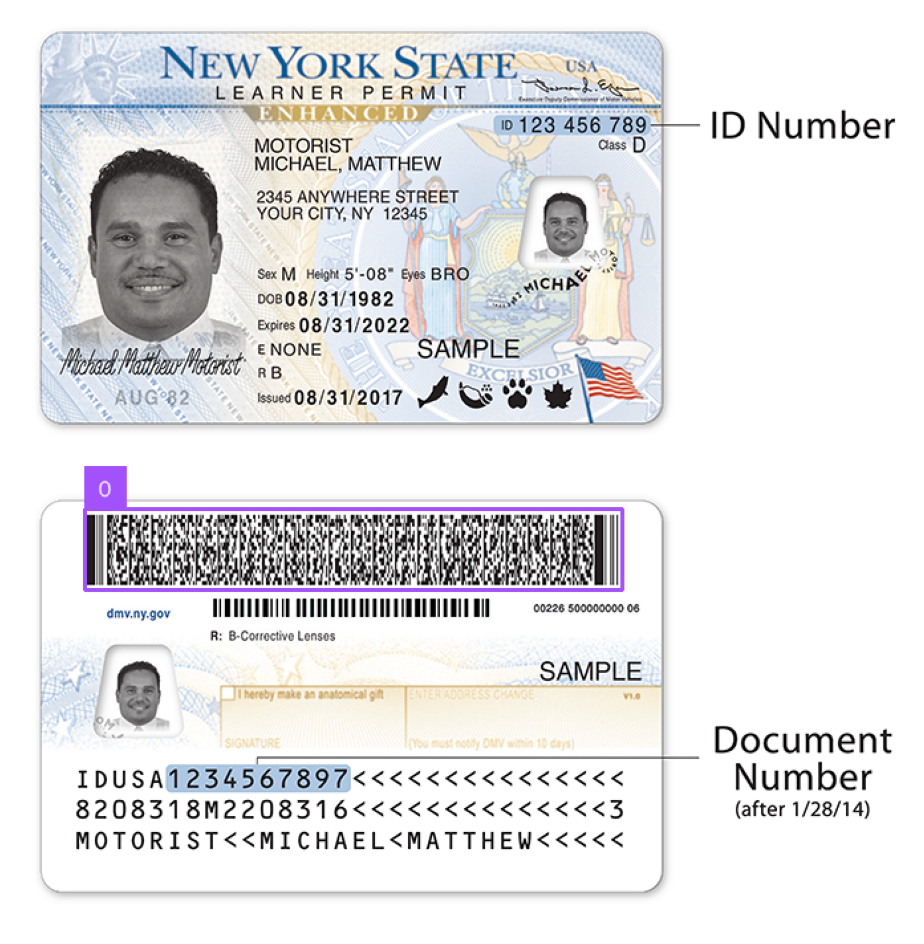

In [31]:
url = "https://d2qea59vi8or.cloudfront.net/wp-content/uploads/2009/05/Screen-Shot-2019-01-07-at-7.50.59-PM.png"

image = Image.open(io.BytesIO(requests.get(url).content)).convert("RGB")
detections = model.predict(image)

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

sv.plot_image(annotated_image)

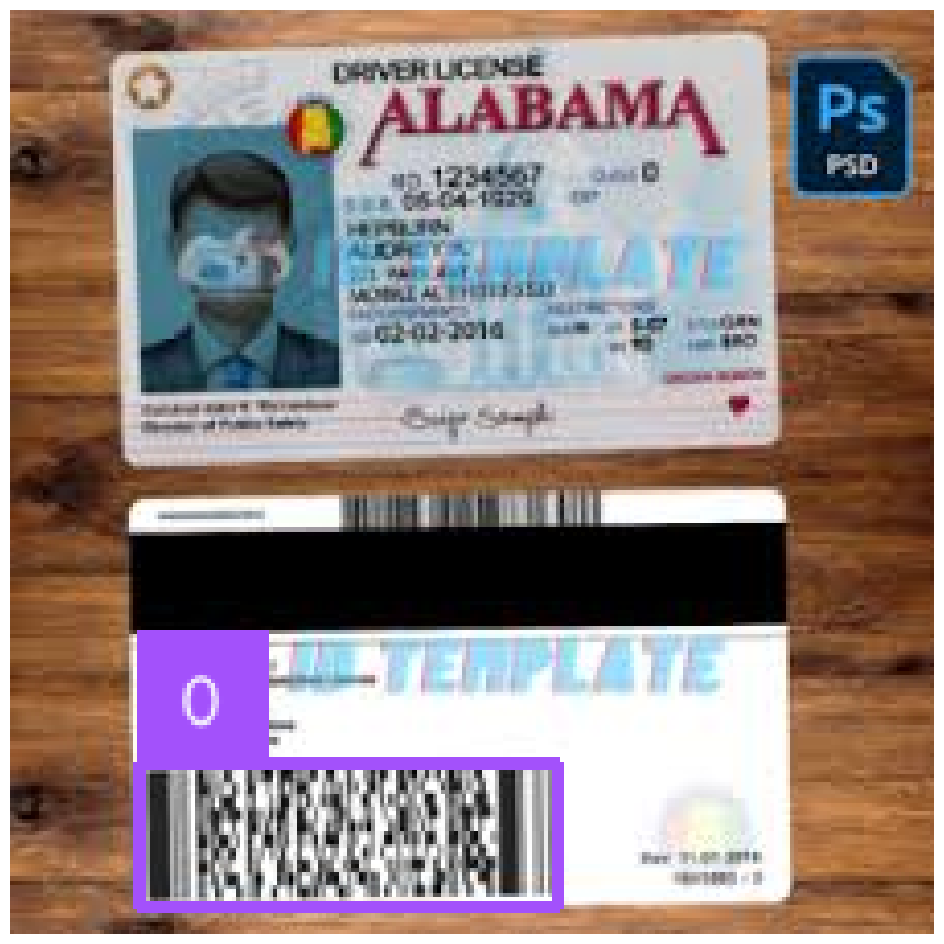

In [45]:
url = "/content/test_image.jpg"

image = Image.open(url).convert("RGB") #io.BytesIO(requests.get(url).content))
detections = model.predict(image)

# labels = [
#     f"{COCO_CLASSES[class_id]} {confidence:.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

sv.plot_image(annotated_image)


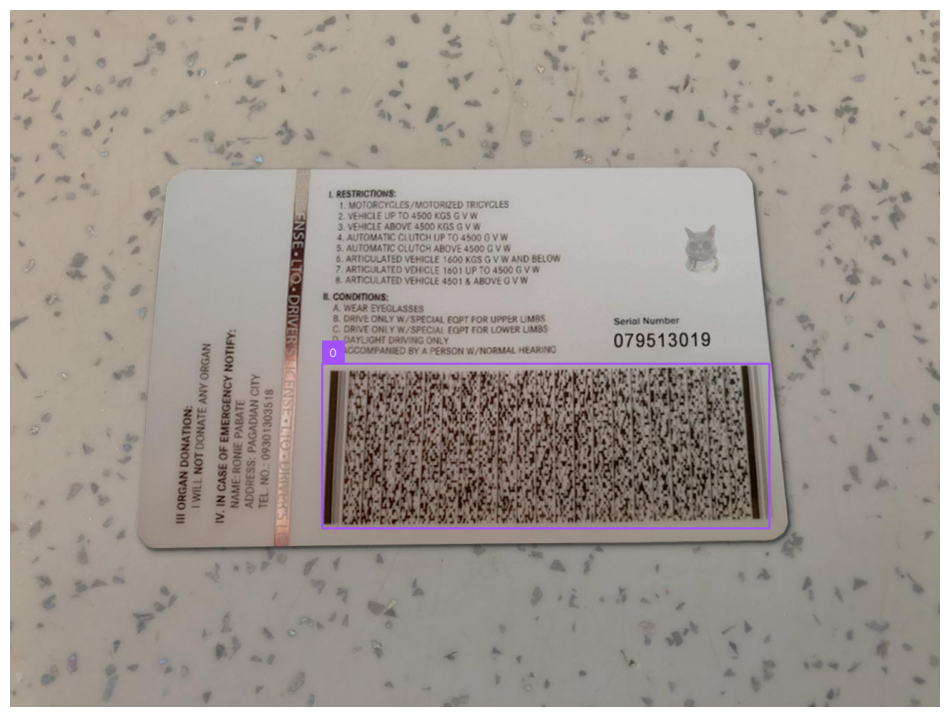

In [41]:
url = "https://psdtemplate.org/wp-content/uploads/2023/10/Philippines-Driver-License-Template-2.jpg"

image = Image.open(io.BytesIO(requests.get(url).content)).convert("RGB")
detections = model.predict(image)

# labels = [
#     f"{COCO_CLASSES[class_id]} {confidence:.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

sv.plot_image(annotated_image)

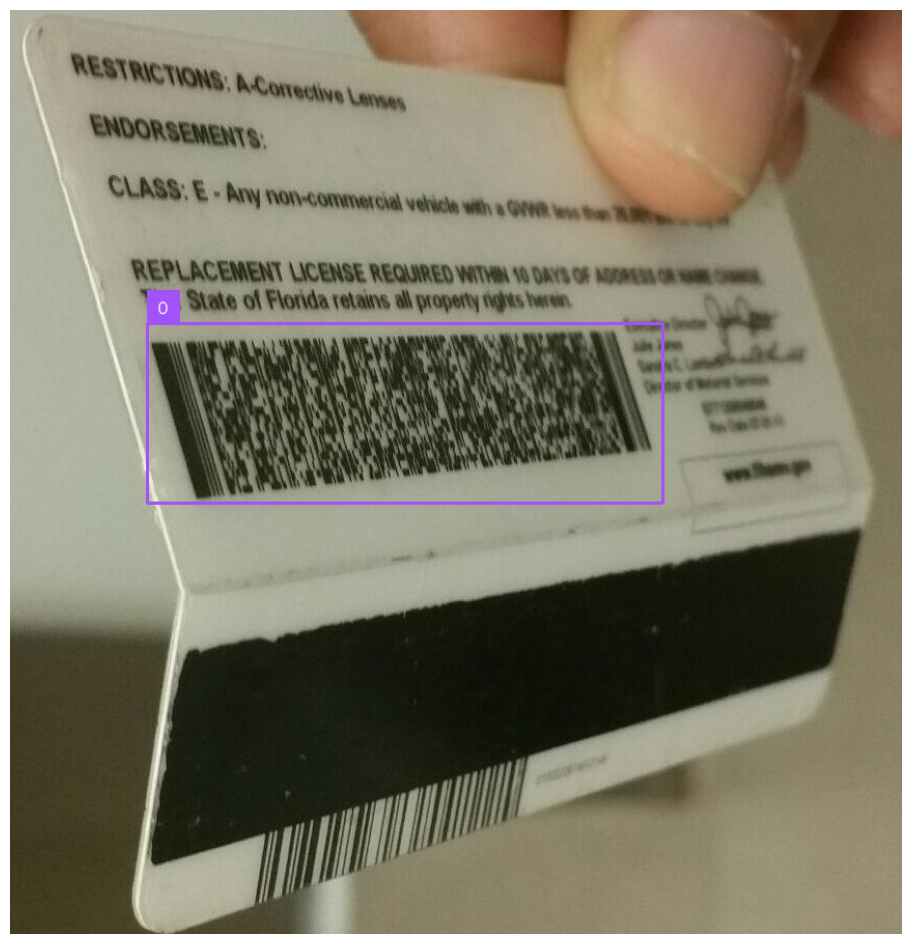

In [44]:
url = "/content/DBkHw0k.jpg"

image = Image.open(url).convert("RGB") #io.BytesIO(requests.get(url).content))
detections = model.predict(image)

# labels = [
#     f"{COCO_CLASSES[class_id]} {confidence:.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

sv.plot_image(annotated_image)

Please enter your image URL : https://psdtemplate.org/wp-content/uploads/2023/10/Nevada-Driver-License-Template-2.jpg


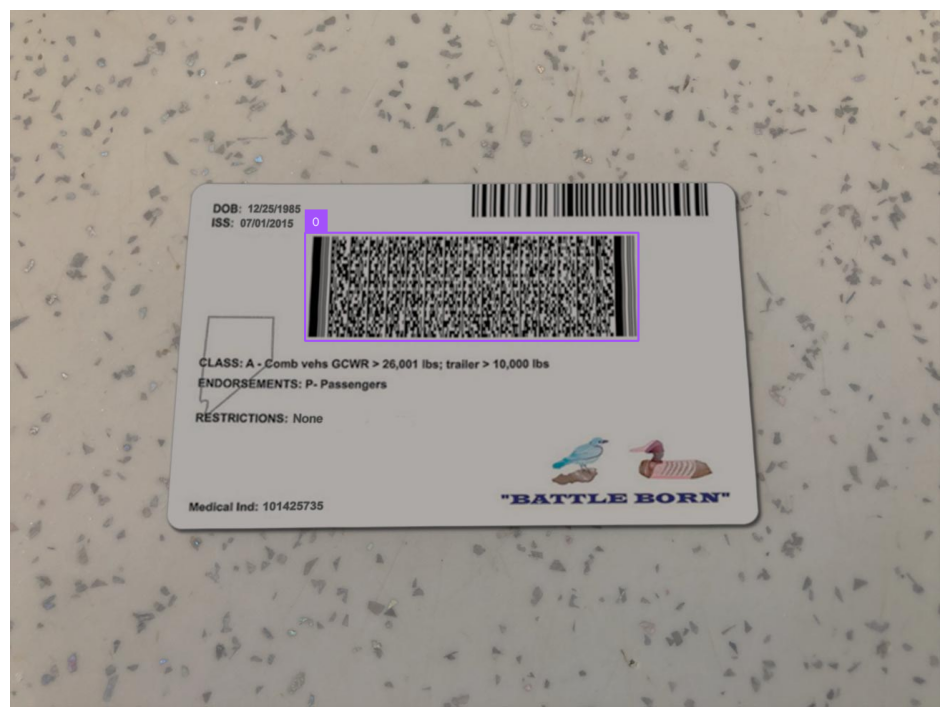

In [42]:
url = input("Please enter your image URL : ")


image = Image.open(io.BytesIO(requests.get(url).content)).convert("RGB")
detections = model.predict(image)

# labels = [
#     f"{COCO_CLASSES[class_id]} {confidence:.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

sv.plot_image(annotated_image)

Please enter your image URL : https://psdtemplate.org/wp-content/uploads/2023/10/Philippines-Driver-License-Template-6.jpg


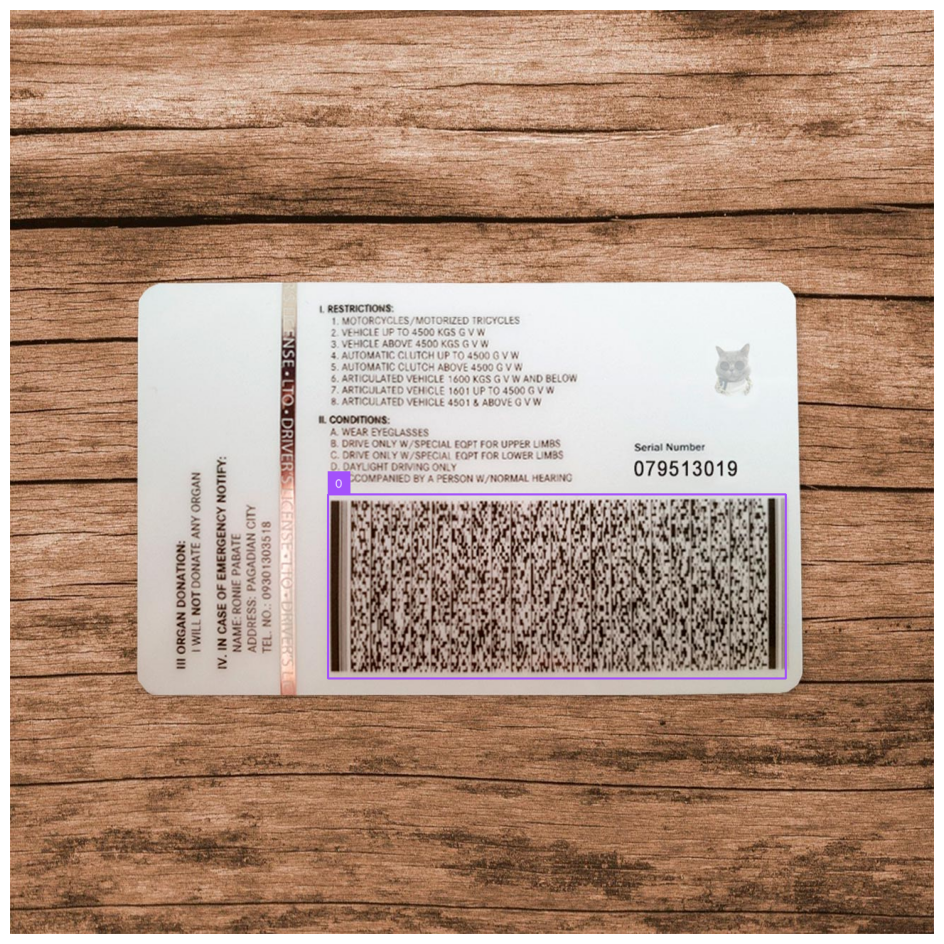

In [43]:
url = input("Please enter your image URL : ")


image = Image.open(io.BytesIO(requests.get(url).content)).convert("RGB")
detections = model.predict(image)

# labels = [
#     f"{COCO_CLASSES[class_id]} {confidence:.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

sv.plot_image(annotated_image)

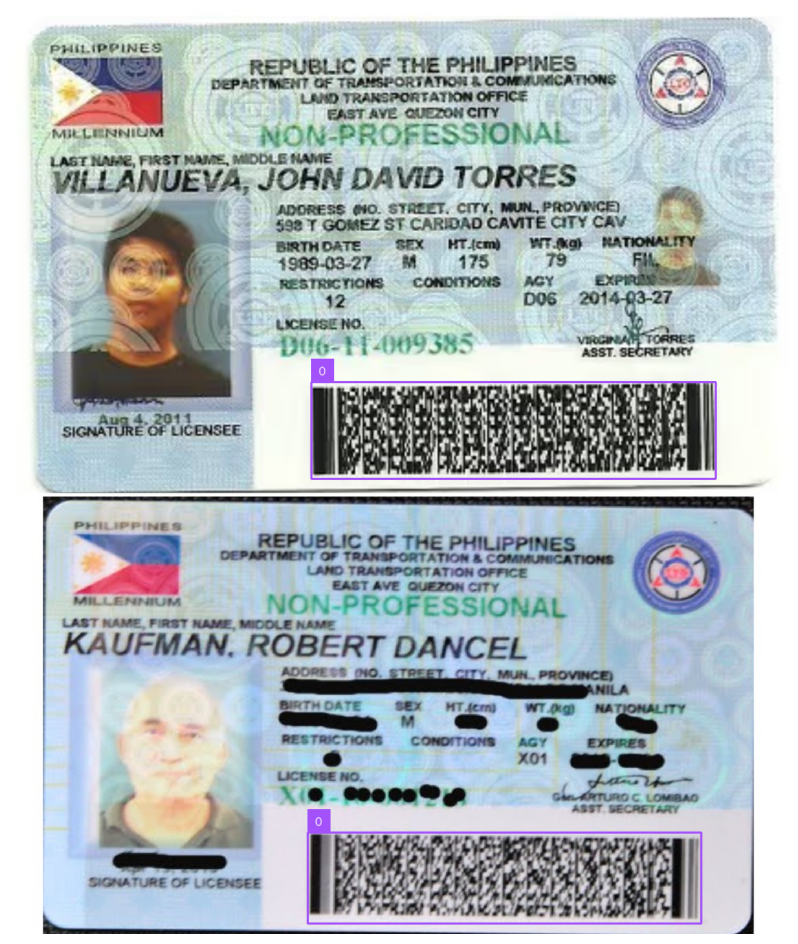

In [47]:
url = "/content/WhatsApp Image 2025-05-25 at 18.49.22.jpeg"

image = Image.open(url).convert("RGB") #io.BytesIO(requests.get(url).content))
detections = model.predict(image)

# labels = [
#     f"{COCO_CLASSES[class_id]} {confidence:.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

sv.plot_image(annotated_image)